In [1]:
#importing all the pre-requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [2]:
data_train =pd.read_csv('F:\\data_science\\mushroom_train.csv')
data_test =pd.read_csv('F:\\data_science\\mushroom_test.csv')

#a look at the data
data_train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [3]:
#dimensions of data
data_train.shape

(5686, 25)

In [4]:
data_train.isnull().sum()#checking for null columns

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
radius                      0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
weight                      0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null columns.

In [5]:
data_train.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'radius', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'weight',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [6]:
#having an insight of the data types of variables
data_train.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
radius                       int64
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
weight                       int64
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
categorical_variable=data_train.dtypes[data_train.dtypes=='object'].index.values

In [8]:
data_train[categorical_variable].apply(lambda x: len(x.unique()))

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

We see that for veil-type variable, data for only one type is available. Therefore, this variable is of no use.

In [9]:
#deleting the veil-type column
del data_train['veil-type']
del data_test['veil-type']
data_train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,k,p,w,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,s,w,w,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,s,e,e,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,s,p,w,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,s,w,w,w,36,o,p,n,s,m


In [10]:
#redefining categorical variable
categorical_variable=data_train.dtypes[data_train.dtypes=='object'].index.values

### encoding of caetgorical variables as numerical values

In [11]:
#stalk-root has missing values
data_train['stalk-root'].head(10)

0    ?
1    e
2    ?
3    ?
4    c
5    b
6    e
7    b
8    ?
9    b
Name: stalk-root, dtype: object

In [12]:
#Excluuding the stalk-root class from encoding
new_categorical_variable=[x for x in categorical_variable if x not in ['stalk-root','class']]
new_categorical_variable

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for var in new_categorical_variable:
    data_train[var]=le.fit_transform(data_train[var])
    data_test[var]=le.transform(data_test[var])
data_train['class']=le.fit_transform(data_train['class'])
data_train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,...,1,6,7,2,38,1,0,7,4,2
1,1,5,3,8,1,6,1,0,1,4,...,2,7,7,2,43,1,4,3,4,5
2,0,2,2,4,1,5,1,0,0,1,...,2,2,2,2,37,2,0,7,1,6
3,1,5,2,2,0,8,1,0,1,0,...,2,6,7,2,82,1,0,7,4,2
4,0,5,2,8,1,3,1,0,0,5,...,2,7,7,2,36,1,4,3,3,3


## Filling of missing values

In [14]:
grouped_data=data_train['class'].groupby(data_train['stalk-root']).count()
grouped_data

stalk-root
?    1727
b    2665
c     382
e     780
r     132
Name: class, dtype: int64

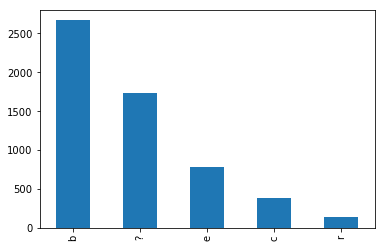

In [15]:
data_train['stalk-root'].value_counts().plot(kind='bar')

splitting of dataset for imputation of the missing values

In [16]:
#dataset with missing values of stalk-root.
new_data_train_i=data_train[data_train['stalk-root']=='?']
data_test_i=data_test[data_test['stalk-root']=='?']

In [17]:
new_data_train_i=new_data_train_i.reset_index()
data_test_i=data_test_i.reset_index()

In [18]:
del new_data_train_i['index']
del data_test_i['index']
new_data_train_i  #dataframe with missing values of stalk-root

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,...,1,6,7,2,38,1,0,7,4,2
1,0,2,2,4,1,5,1,0,0,1,...,2,2,2,2,37,2,0,7,1,6
2,1,5,2,2,0,8,1,0,1,0,...,2,6,7,2,82,1,0,7,4,2
3,1,5,3,2,0,2,1,0,1,0,...,2,6,6,2,50,1,0,7,4,4
4,1,5,2,4,0,8,1,0,1,0,...,2,6,6,2,34,1,0,7,4,0
5,0,5,3,8,0,5,1,0,1,7,...,0,7,7,2,23,1,1,1,4,0
6,1,2,2,4,0,8,1,0,1,0,...,2,6,7,2,23,1,0,7,4,2
7,1,2,2,2,0,7,1,0,1,0,...,2,6,7,2,38,1,0,7,4,4
8,0,0,2,3,0,5,1,1,0,7,...,1,7,7,2,23,2,4,7,3,1
9,1,2,2,2,0,8,1,0,1,0,...,2,7,7,2,46,1,0,7,4,0


In [19]:
#dataset with known value of stalk-root variable which will used to train a model
new_data_train_i_train=data_train[data_train['stalk-root']!='?']
data_test_i_train=data_test[data_test['stalk-root']!='?']

In [20]:
new_data_train_i_train=new_data_train_i_train.reset_index()
data_test_i_train=data_test_i_train.reset_index()

In [21]:
del new_data_train_i_train['index']
del data_test_i_train['index']
new_data_train_i_train #dataframe with known values of stalk-root variables

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,3,8,1,6,1,0,1,4,...,2,7,7,2,43,1,4,3,4,5
1,0,5,2,8,1,3,1,0,0,5,...,2,7,7,2,36,1,4,3,3,3
2,1,5,0,9,0,2,1,0,0,3,...,1,6,4,2,23,1,2,1,5,1
3,0,2,2,3,0,5,1,1,0,7,...,2,7,7,2,43,1,0,3,0,1
4,0,2,0,4,1,5,1,0,0,9,...,2,3,7,2,25,1,4,3,4,0
5,1,5,2,3,1,2,1,0,0,3,...,2,7,7,2,47,1,4,1,4,1
6,1,5,0,9,0,2,1,0,0,3,...,1,0,0,2,43,1,2,1,4,0
7,0,5,3,8,1,3,1,0,0,2,...,2,7,7,2,23,1,4,3,2,1
8,0,2,0,3,1,5,1,0,0,9,...,2,7,3,2,36,1,4,3,4,0
9,1,5,0,3,0,2,1,0,0,3,...,1,6,4,2,64,1,2,1,5,0


In [22]:
#setting of dependent and independent variables for imputing the values
dependent_var_i=['stalk-root']
independent_var_i=[x for x in data_train.columns if x not in dependent_var_i]

In [23]:
new_data_train_i_train['stalk-root']=le.fit_transform(new_data_train_i_train['stalk-root'])
data_test_i_train['stalk-root']=le.fit_transform(data_test_i_train['stalk-root'])

In [24]:
del new_data_train_i['stalk-root']
del data_test_i['stalk-root']

I am going to impute the missing values using the Logistic Regression classifier

In [25]:
from sklearn.linear_model import LogisticRegression
impute_dtm=LogisticRegression()

In [26]:
impute_dtm.fit(new_data_train_i_train[independent_var_i],new_data_train_i_train[dependent_var_i])
values=impute_dtm.predict(new_data_train_i)
values #predicted missing values of stalk-root class

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 1, 2, ..., 0, 2, 2], dtype=int64)

In [27]:
new_data_train_i['stalk-root']=values

#### output for imputed values of stalk-root class

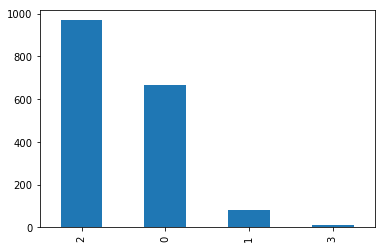

In [28]:
new_data_train_i['stalk-root'].value_counts().plot(kind='bar')#bar graph for predicted missing values

In [29]:
#combining the two datasets to one again
new_data_train=pd.DataFrame()
new_data_train=new_data_train.append(new_data_train_i, ignore_index=True)
new_data_train=new_data_train.append(new_data_train_i_train,ignore_index=True)
new_data_train

,bruises,cap-color,cap-shape,cap-surface,class,gill-attachment,gill-color,gill-size,gill-spacing,habitat,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,weight
0,0,2,2,2,1,1,0,1,0,2,...,0,7,6,7,2,1,2,1,2,38
1,1,4,2,2,0,1,1,0,0,6,...,0,7,2,2,1,0,2,2,2,37
2,0,2,5,2,1,1,0,1,0,2,...,0,7,6,7,2,1,1,2,2,82
3,0,2,5,3,1,1,0,1,0,4,...,0,7,6,6,0,1,2,2,2,50
4,0,4,5,2,1,1,0,1,0,0,...,0,7,6,6,2,1,1,2,2,34
5,0,8,5,3,0,1,7,1,0,0,...,1,1,7,7,2,0,2,0,2,23
6,0,4,2,2,1,1,0,1,0,2,...,0,7,6,7,2,1,1,2,2,23
7,0,2,2,2,1,1,0,1,0,4,...,0,7,6,7,2,1,1,2,2,38
8,0,3,0,2,0,1,7,0,1,1,...,4,7,7,7,0,0,1,1,2,23
9,0,2,2,2,1,1,0,1,0,0,...,0,7,7,7,2,1,1,2,2,46


## Visualising the data

In [30]:
import seaborn as sns

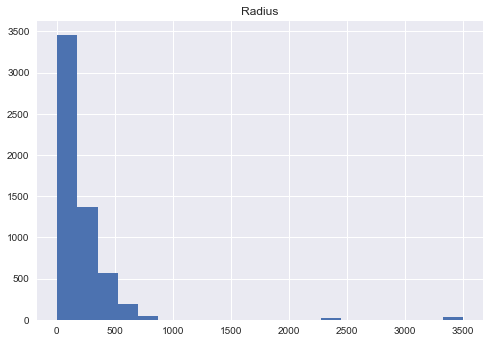

In [31]:
#distribution of radius
plt.hist(new_data_train.radius,bins=20)
plt.title('Radius')
plt.show()

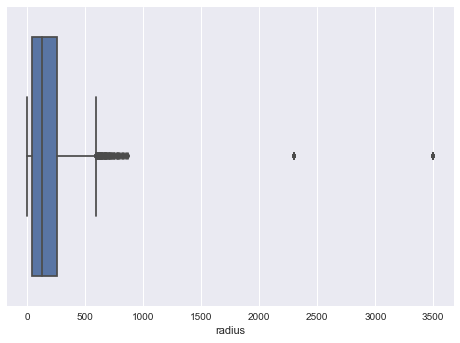

In [32]:
sns.boxplot(x=new_data_train['radius']);

In [33]:
#there are only 65 examples of radius>1000 out of 5686
np.sum(new_data_train.radius>1000)

65

In [34]:
new_data_train[new_data_train.radius>1000]

,bruises,cap-color,cap-shape,cap-surface,class,gill-attachment,gill-color,gill-size,gill-spacing,habitat,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,weight
24,0,2,2,2,1,1,0,1,0,4,...,0,7,6,7,2,1,2,1,2,24
187,0,2,5,2,1,1,0,1,0,0,...,0,7,6,7,2,1,2,1,2,23
297,0,4,5,2,0,0,5,0,0,2,...,4,8,5,5,1,0,2,2,0,23
537,0,4,0,2,0,0,5,0,0,2,...,4,4,5,5,2,0,2,2,0,12
766,0,2,5,3,1,1,0,1,0,4,...,0,7,7,6,0,1,2,1,2,30
845,0,4,5,3,1,1,0,1,0,2,...,0,7,6,7,2,1,1,1,2,23
882,0,8,5,0,0,1,7,0,1,1,...,4,7,7,7,0,0,2,1,2,26
1026,1,2,5,3,0,1,10,0,0,6,...,0,7,2,2,1,0,2,2,2,40
1120,0,2,2,2,1,1,0,1,0,2,...,0,7,7,6,0,1,2,2,2,28
1293,0,2,2,2,1,1,0,1,0,0,...,0,7,7,6,0,1,2,1,2,25


In [35]:
new_data_train[new_data_train.radius==0] #checking if radius is zero for some data points

,bruises,cap-color,cap-shape,cap-surface,class,gill-attachment,gill-color,gill-size,gill-spacing,habitat,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,weight


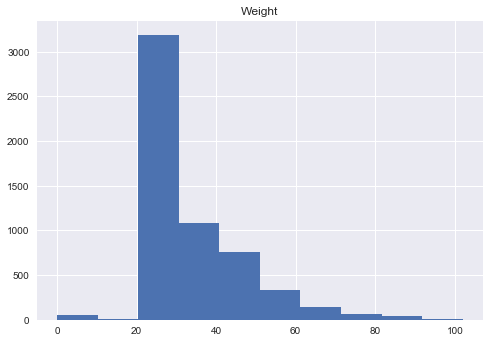

In [36]:
#distribution of weight
plt.hist(new_data_train.weight,bins=10)
plt.title('Weight')
plt.show()

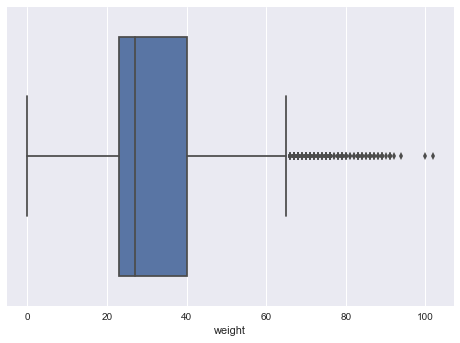

In [37]:
sns.boxplot(x=new_data_train['weight']);

In [38]:
new_data_train[new_data_train.weight<20]

,bruises,cap-color,cap-shape,cap-surface,class,gill-attachment,gill-color,gill-size,gill-spacing,habitat,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,weight
152,0,2,2,3,1,1,0,1,0,2,...,0,7,7,6,2,1,1,1,2,0
204,0,4,3,2,0,0,5,0,0,2,...,4,0,5,5,2,0,2,2,1,0
220,0,4,5,2,1,1,0,1,0,4,...,0,7,7,7,0,1,2,1,2,13
537,0,4,0,2,0,0,5,0,0,2,...,4,4,5,5,2,0,2,2,0,12
1044,0,4,0,2,0,0,11,0,0,2,...,4,8,5,5,0,0,2,2,0,18
1049,0,3,3,2,0,1,2,0,1,1,...,4,7,7,7,0,0,1,1,2,0
1072,0,4,5,2,0,0,6,0,0,2,...,4,8,5,5,1,0,2,2,1,0
1206,0,3,3,2,0,1,2,0,1,1,...,4,7,7,7,0,0,1,2,2,11
1269,1,4,3,2,0,1,10,0,0,6,...,0,7,7,7,2,0,2,2,2,0
1306,0,4,2,3,1,1,0,1,0,4,...,0,7,7,6,0,1,1,1,2,15


Here, we see many zero weights!! Probably the outliers.

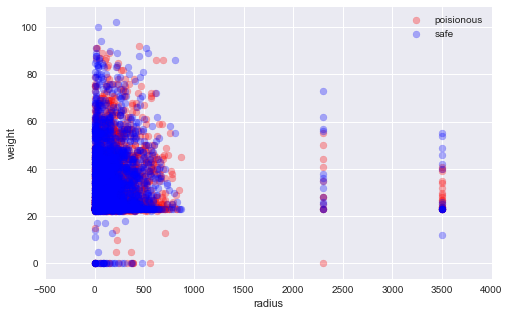

In [39]:
#scatter plot for data for radius and weight
poisionous=(new_data_train[new_data_train['class']==1])
safe=(new_data_train[new_data_train['class']==0])
fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(poisionous.radius,poisionous.weight,color='red',label='poisionous',alpha=0.3)
ax.scatter(safe.radius,safe.weight,color='blue',label='safe',alpha=0.3)
ax.set_xticks([-500,0,500,1000,1500,2000,2500,3000,3500,4000])
ax.set_xlabel('radius')
ax.set_ylabel('weight')
ax.legend();

### Removing the outliers

In [40]:
#dataframe with outliers removed
cleaned_data_train=new_data_train[(new_data_train.radius<1000) & (new_data_train.weight>0)]

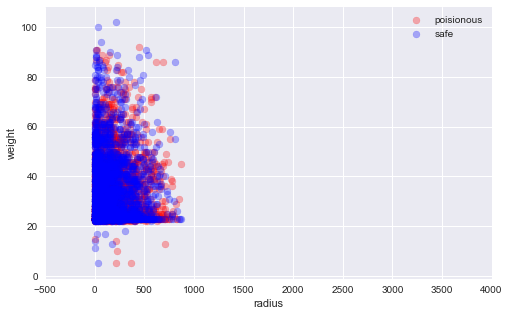

In [41]:
#scatter plot for data wiht removed outliers
_poisionous=(cleaned_data_train[cleaned_data_train['class']==1])
_safe=(cleaned_data_train[cleaned_data_train['class']==0])
fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(_poisionous.radius,_poisionous.weight,color='red',label='poisionous',alpha=0.3)
ax.scatter(_safe.radius,_safe.weight,color='blue',label='safe',alpha=0.3)
ax.set_xticks([-500,0,500,1000,1500,2000,2500,3000,3500,4000])
ax.set_xlabel('radius')
ax.set_ylabel('weight')
ax.legend();

In [42]:
#changing the datatypes of all variables to integers
cleaned_data_train=cleaned_data_train.astype(int)

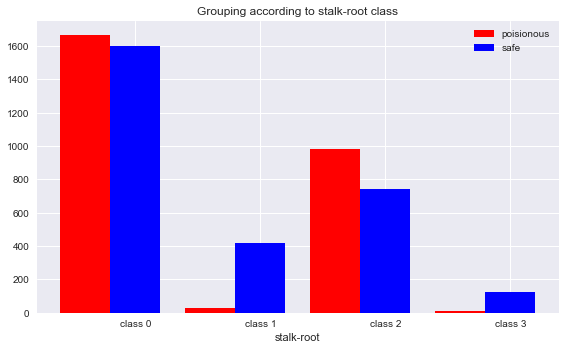

In [43]:
crosstable=pd.crosstab(cleaned_data_train['stalk-root'],cleaned_data_train['class'])
poisionous_class=crosstable[1]
safe_class=crosstable[0]
fig,ax=plt.subplots(figsize=(8,5))
width=0.4
xlocs=np.arange(len(poisionous_class))
ax.bar(xlocs-width,poisionous_class,width,color='red',label='poisionous')
ax.bar(xlocs,safe_class,width,color='blue',label='safe')
ax.yaxis.grid(True)
ax.set_xticks(ticks=range(len(poisionous_class)))
ax.set_xlabel('stalk-root')
ax.set_title('Grouping according to stalk-root class')
ax.set_xticklabels(['class 0','class 1','class 2','class 3'])
ax.legend()
fig.tight_layout(pad=1)

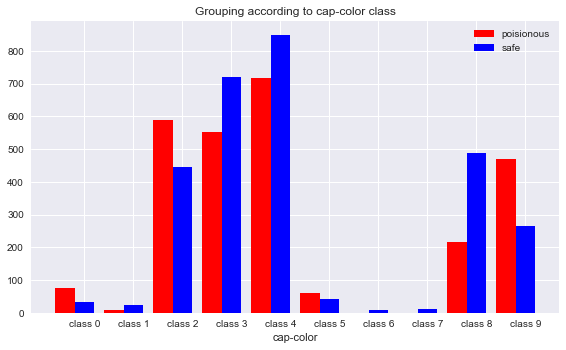

In [44]:
crosstable_cap=pd.crosstab(cleaned_data_train['cap-color'],cleaned_data_train['class'])
poisionous_class_cap=crosstable_cap[1]
safe_class_cap=crosstable_cap[0]
fig,ax=plt.subplots(figsize=(8,5))
width=0.4
xlocs=np.arange(10)
ax.bar(xlocs-width,poisionous_class_cap,width,color='red',label='poisionous')
ax.bar(xlocs,safe_class_cap,width,color='blue',label='safe')
ax.yaxis.grid(True)
ax.set_xticks(ticks=range(10))
ax.set_xlabel('cap-color')
ax.set_title('Grouping according to cap-color class')
ax.set_xticklabels(['class '+str(x) for x in range(10)])
ax.legend()
fig.tight_layout(pad=1)

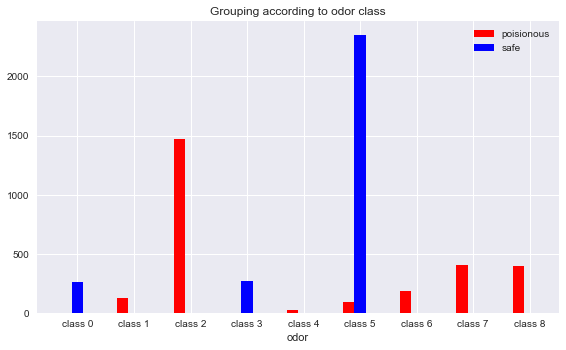

In [45]:
crosstable_odor=pd.crosstab(cleaned_data_train['odor'],cleaned_data_train['class'])
poisionous_class_odor=crosstable_odor[1]
safe_class_odor=crosstable_odor[0]
fig,ax=plt.subplots(figsize=(8,5))
width=0.2
xlocs=np.arange(len(poisionous_class_odor))
ax.bar(xlocs-width,poisionous_class_odor,width,color='red',label='poisionous')
ax.bar(xlocs,safe_class_odor,width,color='blue',label='safe')
ax.yaxis.grid(True)
#ax.xaxis.grid(True)
ax.set_xticks(ticks=range(len(poisionous_class_odor)))
ax.set_xlabel('odor')
ax.set_title('Grouping according to odor class')
ax.set_xticklabels(['class '+str(x) for x in range(len(poisionous_class_odor))])
ax.legend(loc='best')
fig.tight_layout(pad=1)

Odor can be an important variable for a decision tree classifier as most of classes are of one type.

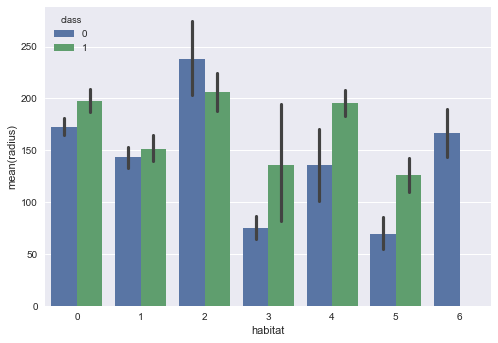

In [46]:
sns.barplot(x='habitat', y='radius', hue="class", data=cleaned_data_train);

The above barplot shows average radius for different class of mushrooms in different habitats.

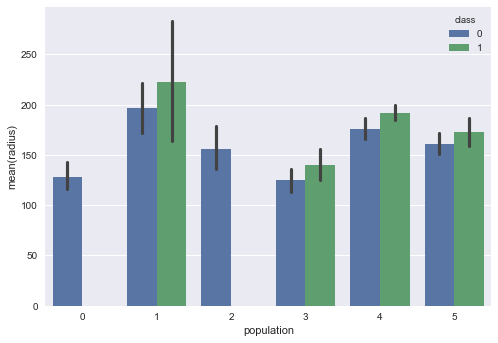

In [47]:
sns.barplot(x='population', y='radius', hue='class', data=cleaned_data_train);

We can see that in population distribution type 0 and 2, only safe mushrooms are found.

### Fitting a model

In [48]:
dependent_variable=['class']
independent_variables=[i for i in cleaned_data_train.columns if i not in dependent_variable]

In [49]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(cleaned_data_train[independent_variables],
                                                  cleaned_data_train[dependent_variable],random_state=0)

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Logistic regression

In [50]:
# logistic regression
from sklearn.linear_model import LogisticRegression
C=[0.1,1,100]
for c in C:
    lr=LogisticRegression(C=c)
    lr.fit(X_train,y_train)
    print("C="+str(c))
    print('Accuracy on training set: {:.4f}'.format(lr.score(X_train, y_train)))
    print('Accuracy of test set: {:.4f}'.format(lr.score(X_test, y_test)))
    print('\n')

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1
Accuracy on training set: 0.9335
Accuracy of test set: 0.9469


C=1
Accuracy on training set: 0.9550
Accuracy of test set: 0.9627


C=100
Accuracy on training set: 0.9677
Accuracy of test set: 0.9670




#### Decision tree classifier

In [51]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
max_depth=[3,6,10]
for m in max_depth:
    dtc=DecisionTreeClassifier(max_depth=m)
    dtc.fit(X_train,y_train)
    print("max_depth="+str(m))
    print('Accuracy on training set: {:.4f}'.format(dtc.score(X_train, y_train)))
    print('Accuracy of test set: {:.4f}'.format(dtc.score(X_test, y_test)))
    print('\n')

max_depth=3
Accuracy on training set: 0.9576
Accuracy of test set: 0.9512


max_depth=6
Accuracy on training set: 0.9943
Accuracy of test set: 0.9943


max_depth=10
Accuracy on training set: 1.0000
Accuracy of test set: 1.0000




Decision tree has performed so well!!

#### Support vector machine: rbf kernel

In [52]:
# normalising the data before fitting this model.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [53]:
from sklearn.svm import SVC
for c in C:
    svm=SVC(C=c)
    svm.fit(X_train_scaled,y_train)
    print("C="+str(c))
    print('Accuracy on training set: {:.4f}'.format(svm.score(X_train_scaled, y_train)))
    print('Accuracy of test set: {:.4f}'.format(svm.score(X_test_scaled, y_test)))
    print('\n')

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1
Accuracy on training set: 0.9239
Accuracy of test set: 0.9318


C=1
Accuracy on training set: 0.9495
Accuracy of test set: 0.9569


C=100
Accuracy on training set: 1.0000
Accuracy of test set: 1.0000




In [54]:
# checking the accuracy on unnormalised data
svm_unnorm=SVC()
svm_unnorm.fit(X_train,y_train)

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
print('Accuracy on training set: {:.4f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))

Accuracy on training set: 0.5120
Accuracy on test set: 0.5341


We can see that un-normalised data gives drastically less accuracy!

### Cross validation score

In [73]:
# cross validation score for decision tree classifier
from sklearn.model_selection import cross_val_score

dtc_cross = DecisionTreeClassifier(max_depth=10)
X=cleaned_data_train[independent_variables].as_matrix()
y=cleaned_data_train[dependent_variable].as_matrix().reshape(1,-1)[0]
cv_scores = cross_val_score(dtc_cross, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [ 0.83737211  1.          1.        ]
Mean cross-validation score (3-fold): 0.946


In [57]:
# cross validation score for svm
svm_cross = SVC(C=100)
X_scaled=scaler.fit_transform(X)
cv_scores_svm=cross_val_score(svm_cross, X_scaled, y)

print('Cross-validation scores (3-fold):', cv_scores_svm)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores_svm)))

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


Cross-validation scores (3-fold): [ 0.94830372  1.          1.        ]
Mean cross-validation score (3-fold): 0.983


In [58]:
#cross validation score for logistic regression
lr_cross=LogisticRegression(C=100)
cv_scores_lr=cross_val_score(lr_cross, X, y)

print('Cross-validation scores (3-fold):', cv_scores_lr)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores_lr)))

Cross-validation scores (3-fold): [ 0.97092084  0.96230479  0.94022617]
Mean cross-validation score (3-fold): 0.958


## Predictions for the test data

In [59]:
data_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,5,0,3,1,5,1,0,0,9,1,...,2,6,3,2,23,1,4,2,5,0
1,5,3,3,0,2,1,0,0,2,0,...,1,0,0,2,23,1,2,1,4,0
2,0,2,8,1,0,1,0,0,10,0,...,2,7,7,2,24,1,4,2,3,3
3,2,3,9,0,2,1,0,0,7,0,...,1,4,0,2,53,1,2,1,5,0
4,0,3,9,1,0,1,0,0,10,0,...,2,7,7,2,24,1,4,2,2,3
5,2,0,9,0,2,1,0,0,3,0,...,1,4,0,2,23,1,2,1,5,0
6,5,0,5,0,1,1,0,1,5,0,...,2,7,7,2,24,1,4,3,3,0
7,3,2,4,0,5,0,0,0,5,0,...,2,5,5,1,24,1,4,0,4,2
8,2,3,4,1,5,1,0,0,7,1,...,2,6,7,2,23,1,4,3,4,0
9,2,2,8,1,2,1,0,0,3,1,...,2,7,7,2,23,1,4,1,4,5


In [60]:
data_test.shape

(2438, 23)

In [61]:
categorical_variables_test=[x for x in data_test.columns if x not in ['radius','weight']]
categorical_variables_test

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

We need to impute the missing values of stalk-root class

In [62]:
independent_var_i_test=[x for x in independent_var_i if x not in ['class']]

In [63]:
lr_test=LogisticRegression()#model for missing value imputation
lr_test.fit(data_test_i_train[independent_var_i_test],data_test_i_train['stalk-root'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
data_test_i['stalk-root']=lr_test.predict(data_test_i[independent_var_i_test])

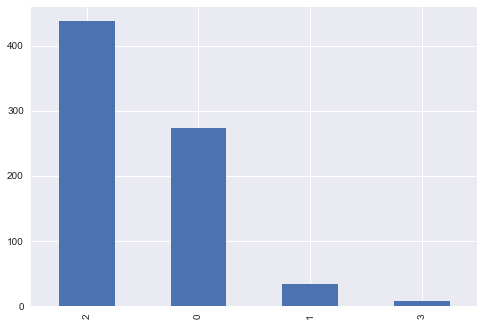

In [65]:
data_test_i['stalk-root'].value_counts().plot(kind='bar');

It has almost same distribution as we saw for training data imputed values.

In [66]:
#combining the test data into single dataframe
new_data_test=pd.DataFrame()
new_data_test=new_data_test.append(data_test_i,ignore_index=True)
new_data_test=new_data_test.append(data_test_i_train, ignore_index=True)
new_data_test

,bruises,cap-color,cap-shape,cap-surface,gill-attachment,gill-color,gill-size,gill-spacing,habitat,odor,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,weight
0,0,4,3,2,0,5,0,0,2,5,...,4,0,5,5,2,0,2,2,1,24
1,0,2,2,2,1,0,1,0,4,2,...,0,7,6,7,0,1,2,2,2,26
2,1,2,5,3,1,1,0,0,6,5,...,0,7,7,7,2,0,2,2,2,44
3,0,4,3,2,1,0,1,0,0,8,...,0,7,7,6,2,1,2,1,2,38
4,1,4,3,2,1,10,0,0,6,5,...,0,7,2,7,2,0,2,2,2,25
5,1,4,5,2,1,10,0,0,6,5,...,0,7,2,2,0,0,2,2,2,23
6,0,4,2,2,1,0,1,0,4,2,...,0,7,6,6,0,1,2,1,2,27
7,0,4,5,3,1,0,1,0,2,8,...,0,7,7,6,2,1,1,1,2,23
8,0,6,5,3,1,3,1,0,0,5,...,1,1,7,7,2,0,2,0,2,15
9,0,2,5,2,1,0,1,0,4,7,...,0,7,6,7,2,1,1,2,2,23


I am using svm(rbf) for test predictions.

In [67]:
svm_test=SVC(C=100)
svm_test.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
#predictions for test data
test_predictions=svm_test.predict(new_data_test)

In [69]:
np.mean(test_predictions)#fraction of poisionous mushrooms predicted

0.51066447908121415

In [70]:
submission=pd.DataFrame({
    'class': test_predictions
})
submission.to_csv('mushroom_submission.csv', index=False)

#### NOTE: '1' is for poisionous and '0' for safe in mushroom_submission.csv file